In [ ]:
import pandas as pd 

In [ ]:
train=pd.read_csv("/content/Train.csv")
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
test=pd.read_csv("/content/Test.csv")
test.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...
2,a7f43314e3ee6464a4e35b874bddf2ea,Unforgettable Munnar Getaway - Private Picnic ...,Standard,Munnar,3N Munnar,Munnar,09-02-2022,Not Available,New Delhi,Not Available,2,3,Old Munnar Town | Eravikulam national park | ...,This cancellation policy is applicable for boo...
3,d9cc4b407f3d5d290560c03d9ac71035,Munnar for Adventure Lovers - Top Valley Trek,Deluxe,Munnar,3N Munnar,Munnar,16-05-2021,Not Available,Mumbai,Not Available,1,3,Tata Tea Museum | Eravikulam national park | ...,This cancellation policy is applicable for boo...
4,b3bbc8aa6429feb260e9ac0a91f252c4,Splendours of Kerala - Make your own Tea,Luxury,Cochin|Munnar|Thekkady|Allepey,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allepey,Cochin|Munnar|Thekkady|Allepey,13-10-2021,Casino Hotel - Cgh Earth-MMT Holidays Special:...,New Delhi,IndiGo,0,4,Fort Cochin | Dutch Palace | Jewish Synagogue...,Cancellation any time after making the 1st pay...


In [ ]:
count=0
for col in train.columns:
  if col not in ["Uniq Id","Package Name","Package Type","Destination","Itinerary","Places Covered","Travel Date","Hotel Details","Start City","Airline","Flight Stops","Meals","Sightseeing Places Covered","Cancellation Rules","Per Person Price"]:
    for val in test[col].unique():
      if val not in train[col].unique():
        print(col,val)
        count+=1

In [ ]:
train["train"]=1
test["test"]=0

In [ ]:
data=pd.concat([train,test],axis=0)
data


,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,train,test
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,1.0,NaN
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,1.0,NaN
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,1.0,NaN
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,1.0,NaN
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,75171484ea20440a5c08fe040a9a01a7,Trip to Kerala,Standard,Munnar|Thekkady|Allepey,2N Munnar . 1N Thekkady . 1N Allepey,Munnar|Thekkady|Allepey,04-06-2021,Iceberg Hill Hotel-MMT Holidays Special:4|Elep...,New Delhi,Vistara,2,3,Valara Waterfalls | Tea Plantation at Devikul...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0
8996,16f57cebfb653f2c532314322598ca3a,Magical Kashmir Holiday,Deluxe,Srinagar|Pahalgam|Srinagar|Gulmarg,1N Srinagar . 1N Pahalgam . 1N Srinagar . 1N G...,Srinagar|Pahalgam|Srinagar|Gulmarg,07-03-2021,California Group of Houseboats:Three|The China...,Mumbai,IndiGo,1,3,Dal Lake | Pahalgam | Avantipura Ruins | Beta...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0
8997,477f8b3f07e1a6c027152e2cd5d67e4a,Holiday in Dharamshala and Dalhousie from Delhi,Luxury,Dharamshala|Dalhousie,3N Dharamshala . 2N Dalhousie,Dharamshala|Dalhousie,21-08-2021,Little Mastiff Dharamshala - Unit Of Pong View...,Mumbai,Vistara,0,4,Dalai Lama temple | Bhagsu falls | Church of ...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0
8998,c9ce916ec5e1b93134a2f84090284bf9,"Colorful Rajasthan- Jaipur, Jodhpur, Jaisalmer...",Deluxe,Jaipur|Jodhpur|Jaisalmer|Udaipur,2N Jaipur . 1N Jodhpur . 2N Jaisalmer . 2N Uda...,Jaipur|Jodhpur|Jaisalmer|Udaipur,19-03-2021,Souvenir Peppermint:3.9|Lariya Resort:4.3|Gorb...,New Delhi,IndiGo|IndiGo,1,3,City Palace | Hawa Mahal | Jantar Mantar | Ra...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0


In [ ]:
data.isnull().sum()

Uniq Id                           0
Package Name                      0
Package Type                      0
Destination                       0
Itinerary                         0
Places Covered                    0
Travel Date                       0
Hotel Details                     0
Start City                        0
Airline                           0
Flight Stops                      0
Meals                             0
Sightseeing Places Covered        0
Cancellation Rules                0
Per Person Price               9000
train                          9000
test                          21000
dtype: int64

In [ ]:
data.dtypes

Uniq Id                        object
Package Name                   object
Package Type                   object
Destination                    object
Itinerary                      object
Places Covered                 object
Travel Date                    object
Hotel Details                  object
Start City                     object
Airline                        object
Flight Stops                    int64
Meals                           int64
Sightseeing Places Covered     object
Cancellation Rules             object
Per Person Price              float64
train                         float64
test                          float64
dtype: object

In [ ]:
data

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,train,test
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,1.0,NaN
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,1.0,NaN
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,1.0,NaN
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,1.0,NaN
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,75171484ea20440a5c08fe040a9a01a7,Trip to Kerala,Standard,Munnar|Thekkady|Allepey,2N Munnar . 1N Thekkady . 1N Allepey,Munnar|Thekkady|Allepey,04-06-2021,Iceberg Hill Hotel-MMT Holidays Special:4|Elep...,New Delhi,Vistara,2,3,Valara Waterfalls | Tea Plantation at Devikul...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0
8996,16f57cebfb653f2c532314322598ca3a,Magical Kashmir Holiday,Deluxe,Srinagar|Pahalgam|Srinagar|Gulmarg,1N Srinagar . 1N Pahalgam . 1N Srinagar . 1N G...,Srinagar|Pahalgam|Srinagar|Gulmarg,07-03-2021,California Group of Houseboats:Three|The China...,Mumbai,IndiGo,1,3,Dal Lake | Pahalgam | Avantipura Ruins | Beta...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0
8997,477f8b3f07e1a6c027152e2cd5d67e4a,Holiday in Dharamshala and Dalhousie from Delhi,Luxury,Dharamshala|Dalhousie,3N Dharamshala . 2N Dalhousie,Dharamshala|Dalhousie,21-08-2021,Little Mastiff Dharamshala - Unit Of Pong View...,Mumbai,Vistara,0,4,Dalai Lama temple | Bhagsu falls | Church of ...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0
8998,c9ce916ec5e1b93134a2f84090284bf9,"Colorful Rajasthan- Jaipur, Jodhpur, Jaisalmer...",Deluxe,Jaipur|Jodhpur|Jaisalmer|Udaipur,2N Jaipur . 1N Jodhpur . 2N Jaisalmer . 2N Uda...,Jaipur|Jodhpur|Jaisalmer|Udaipur,19-03-2021,Souvenir Peppermint:3.9|Lariya Resort:4.3|Gorb...,New Delhi,IndiGo|IndiGo,1,3,City Palace | Hawa Mahal | Jantar Mantar | Ra...,Cancellation any time after making the 1st pay...,NaN,NaN,0.0


In [ ]:
cols=data.iloc[:,[1,2,3,4,5,6,7,8,9,12,13]]
cols

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,Not Available,Not Available
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...
...,...,...,...,...,...,...,...,...,...,...,...
8995,Trip to Kerala,Standard,Munnar|Thekkady|Allepey,2N Munnar . 1N Thekkady . 1N Allepey,Munnar|Thekkady|Allepey,04-06-2021,Iceberg Hill Hotel-MMT Holidays Special:4|Elep...,New Delhi,Vistara,Valara Waterfalls | Tea Plantation at Devikul...,Cancellation any time after making the 1st pay...
8996,Magical Kashmir Holiday,Deluxe,Srinagar|Pahalgam|Srinagar|Gulmarg,1N Srinagar . 1N Pahalgam . 1N Srinagar . 1N G...,Srinagar|Pahalgam|Srinagar|Gulmarg,07-03-2021,California Group of Houseboats:Three|The China...,Mumbai,IndiGo,Dal Lake | Pahalgam | Avantipura Ruins | Beta...,Cancellation any time after making the 1st pay...
8997,Holiday in Dharamshala and Dalhousie from Delhi,Luxury,Dharamshala|Dalhousie,3N Dharamshala . 2N Dalhousie,Dharamshala|Dalhousie,21-08-2021,Little Mastiff Dharamshala - Unit Of Pong View...,Mumbai,Vistara,Dalai Lama temple | Bhagsu falls | Church of ...,Cancellation any time after making the 1st pay...
8998,"Colorful Rajasthan- Jaipur, Jodhpur, Jaisalmer...",Deluxe,Jaipur|Jodhpur|Jaisalmer|Udaipur,2N Jaipur . 1N Jodhpur . 2N Jaisalmer . 2N Uda...,Jaipur|Jodhpur|Jaisalmer|Udaipur,19-03-2021,Souvenir Peppermint:3.9|Lariya Resort:4.3|Gorb...,New Delhi,IndiGo|IndiGo,City Palace | Hawa Mahal | Jantar Mantar | Ra...,Cancellation any time after making the 1st pay...


In [ ]:
data["Package Name"].unique()

array(['Best of Shimla and Manali Holiday from Delhi',
       'Kashmir Valley vacation',
       'Might of Mewar- Udaipur and Chittorgarh', ...,
       'Unique Kerala Backwater Experience - Purity at Lake Vembanad',
       'Himachal Hues 6 Nights from Delhi - Shared Vehicle',
       'Ladakh Holiday with Pangong Excursion (With Flights)'],
      dtype=object)

In [ ]:
data["Hotel Details"]=data["Hotel Details"].replace(to_replace='Not Available',value="AAA")

In [ ]:
data["Sightseeing Places Covered"]=data["Sightseeing Places Covered"].replace(to_replace='Not Available',value="OOOO")

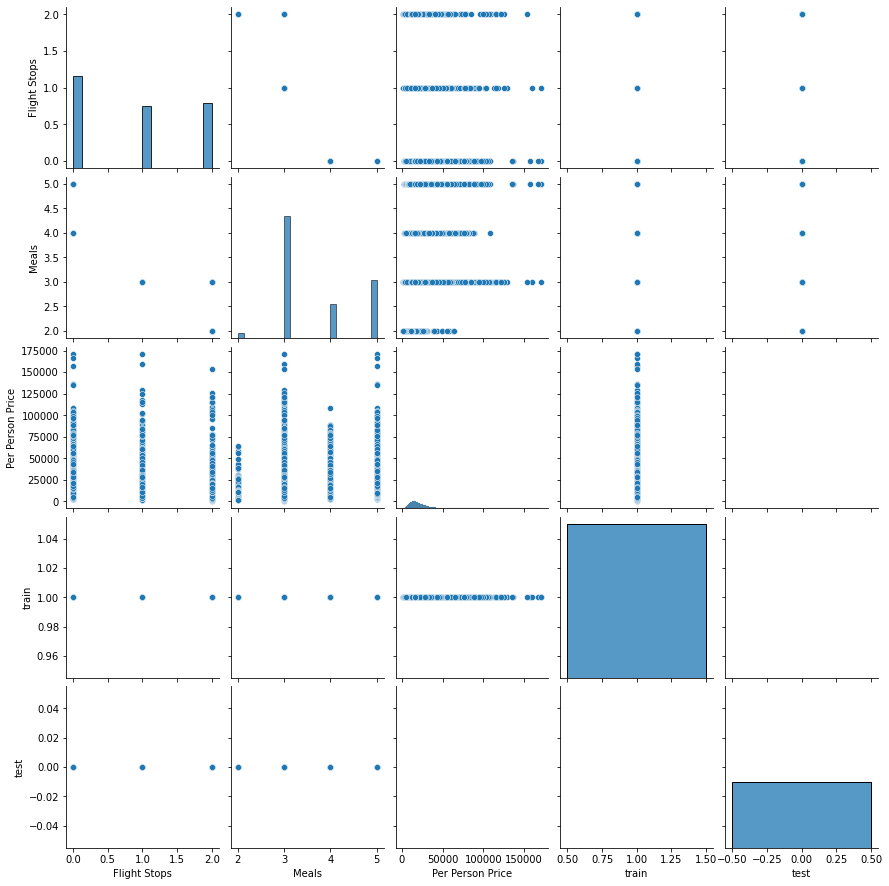

In [ ]:
import seaborn as sns 
sns.pairplot(data)

In [ ]:
cols.head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,Not Available,Not Available
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols1=cols.apply(LabelEncoder().fit_transform)

In [ ]:
cols1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Package Name                30000 non-null  int64
 1   Package Type                30000 non-null  int64
 2   Destination                 30000 non-null  int64
 3   Itinerary                   30000 non-null  int64
 4   Places Covered              30000 non-null  int64
 5   Travel Date                 30000 non-null  int64
 6   Hotel Details               30000 non-null  int64
 7   Start City                  30000 non-null  int64
 8   Airline                     30000 non-null  int64
 9   Sightseeing Places Covered  30000 non-null  int64
 10  Cancellation Rules          30000 non-null  int64
dtypes: int64(11)
memory usage: 2.7 MB


In [ ]:
cols2=data.drop(["Package Name","Package Type","Destination","Itinerary","Places Covered","Travel Date","Hotel Details","Start City","Airline","Sightseeing Places Covered","Cancellation Rules","Per Person Price"],axis=1)

In [ ]:
df=pd.concat([cols1,cols2],axis=1)

In [ ]:
df['Package_name1']= data["Package Name"].apply(lambda x: len(str(x).split())) #we have created a new feature by taking the count of words of sentences in the column 
df["Destination_1"]=data["Destination"].apply(lambda x: len(str(x).split()))
df["Itinerary_1"]=data["Itinerary"].apply(lambda x: len(str(x).split()))
df["Places Covered_1"]=data["Places Covered"].apply(lambda x: len(str(x).split()))
df["Hotel Details_1"]=data["Hotel Details"].apply(lambda x: len(str(x).split()))
df["Sightseeing Places Covered_1"]=data["Sightseeing Places Covered"].apply(lambda x: len(str(x).split()))
df["Cancellation Rules_1"]=data["Cancellation Rules"].apply(lambda x: len(str(x).split()))
df["Airline_1"]=data["Airline"].apply(lambda x: len(str(x).split()))


df['Package1_Itenary1']=df.groupby('Package_name1')['Itinerary_1'].transform("mean")
df['Package1_Destination_1']=df.groupby('Package_name1')['Destination_1'].transform("mean")
df['Package1_Places Covered_1']=df.groupby('Package_name1')['Places Covered_1'].transform("mean")
df['Package1_Hotel Details_1']=df.groupby('Package_name1')['Hotel Details_1'].transform("mean")
df['Package1_Sightseeing_1']=df.groupby('Package_name1')['Sightseeing Places Covered_1'].transform("mean")
df['Package1_Cancellation_1']=df.groupby('Package_name1')['Cancellation Rules_1'].transform("mean")
df['Package1_Airline_1']=df.groupby('Package_name1')['Airline_1'].transform("mean")

df["Package_type_Places Covered"]=df.groupby('Package Type')['Places Covered_1'].transform("mean")
df["Package_type_Itinerary_1"]=df.groupby('Package Type')['Itinerary_1'].transform("mean")
df["Package_type_Hotel Details"]=df.groupby('Package Type')['Hotel Details_1'].transform("mean")
df["Package_SightseeingPlace"]=df.groupby('Package Type')['Sightseeing Places Covered_1'].transform("mean")
df["Package_Cancellation_1"]=df.groupby('Package Type')['Cancellation Rules_1'].transform("mean")

df["Destination_Itenary_1"]=df.groupby('Destination_1')['Itinerary_1'].transform("mean")

df["Destination_SightseeingPlace"]=df.groupby('Destination_1')['Sightseeing Places Covered_1'].transform("mean")
df["Destination_Cancellation_1"]=df.groupby('Destination_1')['Cancellation Rules_1'].transform("mean")

df["Places Covered_Cancellation_1"]=df.groupby('Places Covered_1')['Cancellation Rules_1'].transform("mean")

df["Hotel Details_1Cancellation"]=df.groupby('Hotel Details_1')['Cancellation Rules_1'].transform("mean")
df["Hotel Details_Sightseeing Places"]=df.groupby('Hotel Details_1')['Sightseeing Places Covered_1'].transform("mean")




In [ ]:
df

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules,Uniq Id,Flight Stops,Meals,train,test,Package_name1,Destination_1,Itinerary_1,Places Covered_1,Hotel Details_1,Sightseeing Places Covered_1,Cancellation Rules_1,Airline_1,Package1_Itenary1,Package1_Destination_1,Package1_Places Covered_1,Package1_Hotel Details_1,Package1_Sightseeing_1,Package1_Cancellation_1,Package1_Airline_1,Package_type_Places Covered,Package_type_Itinerary_1,Package_type_Hotel Details,Package_SightseeingPlace,Package_Cancellation_1,Destination_Itenary_1,Destination_SightseeingPlace,Destination_Cancellation_1,Places Covered_Cancellation_1,Hotel Details_1Cancellation,Hotel Details_Sightseeing Places
0,422,4,418,214,419,488,3804,0,250,1796,5,e788ab76d9d8cf1e6ed2f139645ca5d1,2,3,1.0,NaN,8,2,12,2,1,1,2,2,6.484709,1.211313,1.211313,7.617613,27.026443,149.459646,1.597609,1.241219,7.032921,7.462367,27.438869,124.714845,9.728334,29.704671,100.492317,100.492317,141.106740,24.711921
1,1152,3,534,283,535,135,6527,1,145,575,0,178f892630ce3e335a5a41d5d83937fd,0,5,1.0,NaN,3,1,8,1,18,20,81,1,8.512365,1.284084,1.284084,10.802790,28.492074,91.068484,1.379201,1.238693,6.988191,8.936307,27.900879,129.461809,6.137935,25.833521,135.317842,135.317842,81.505643,33.697517
2,1437,2,550,701,551,424,6086,1,130,1058,0,f060f2954840503cc2fdaf495357b7df,0,4,1.0,NaN,6,1,5,1,5,27,81,1,6.770538,1.177904,1.177904,8.267611,28.364873,98.908593,1.723324,1.188353,6.572526,8.236348,26.222910,137.995307,6.137935,25.833521,135.317842,135.317842,147.048966,23.298016
3,487,3,329,528,330,445,1027,1,130,1158,0,32a19a6c171e67448f2346da46c619dc,0,5,1.0,NaN,6,3,13,3,20,30,81,1,6.770538,1.177904,1.177904,8.267611,28.364873,98.908593,1.723324,1.238693,6.988191,8.936307,27.900879,129.461809,11.840502,40.324970,102.795102,102.795102,81.000000,29.922794
4,196,3,444,923,445,203,974,1,279,350,0,107b068aa0ca03bc6248966f594d105f,0,5,1.0,NaN,6,1,5,1,12,23,81,2,6.770538,1.177904,1.177904,8.267611,28.364873,98.908593,1.723324,1.238693,6.988191,8.936307,27.900879,129.461809,6.137935,25.833521,135.317842,135.317842,93.567247,35.042722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2059,4,332,531,333,61,2667,1,338,1738,0,75171484ea20440a5c08fe040a9a01a7,2,3,NaN,0.0,3,1,8,1,12,36,81,1,8.512365,1.284084,1.284084,10.802790,28.492074,91.068484,1.379201,1.241219,7.032921,7.462367,27.438869,124.714845,6.137935,25.833521,135.317842,135.317842,93.567247,35.042722
8996,1362,1,535,273,536,106,290,0,130,608,0,16f57cebfb653f2c532314322598ca3a,1,3,NaN,0.0,3,1,11,1,13,33,81,1,8.512365,1.284084,1.284084,10.802790,28.492074,91.068484,1.379201,1.259678,6.983292,8.933639,27.721144,124.166137,6.137935,25.833521,135.317842,135.317842,90.754294,32.994025
8997,973,2,155,746,156,349,3299,0,338,616,0,477f8b3f07e1a6c027152e2cd5d67e4a,0,4,NaN,0.0,7,1,5,1,11,41,81,1,7.149901,1.233333,1.233333,8.623669,27.916174,103.531953,1.638856,1.188353,6.572526,8.236348,26.222910,137.995307,6.137935,25.833521,135.317842,135.317842,86.181350,31.922197
8998,490,1,216,434,217,310,5426,1,145,287,0,c9ce916ec5e1b93134a2f84090284bf9,1,3,NaN,0.0,6,1,11,1,10,41,81,1,6.770538,1.177904,1.177904,8.267611,28.364873,98.908593,1.723324,1.259678,6.983292,8.933639,27.721144,124.166137,6.137935,25.833521,135.317842,135.317842,95.936834,32.764840


In [ ]:
X=df[df["train"]==1]

X1=X.drop(["train","test","Uniq Id"],axis=1)

In [ ]:
Y=data.iloc[:21000,-3]


In [ ]:
X1.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Sightseeing Places Covered', 'Cancellation Rules',
       'Flight Stops', 'Meals', 'Package_name1', 'Destination_1',
       'Itinerary_1', 'Places Covered_1', 'Hotel Details_1',
       'Sightseeing Places Covered_1', 'Cancellation Rules_1', 'Airline_1',
       'Package1_Itenary1', 'Package1_Destination_1',
       'Package1_Places Covered_1', 'Package1_Hotel Details_1',
       'Package1_Sightseeing_1', 'Package1_Cancellation_1',
       'Package1_Airline_1', 'Package_type_Places Covered',
       'Package_type_Itinerary_1', 'Package_type_Hotel Details',
       'Package_SightseeingPlace', 'Package_Cancellation_1',
       'Destination_Itenary_1', 'Destination_SightseeingPlace',
       'Destination_Cancellation_1', 'Places Covered_Cancellation_1',
       'Hotel Details_1Cancellation', 'Hotel Details_Sightseeing Places'],
      dtype='obj

In [ ]:
test_data=df[df["test"]==0]
test_data.shape
test1=test_data.drop(["train","test","Uniq Id"],axis=1)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
def lgbm_train(X1,Y,test1):
  num_split=10
  excluded_features=["Per Person Price","Uniq Id","train","test"]
  train_features=[f for f in X.columns if f not in excluded_features]
  
  oof_preds = np.zeros(X1.shape[0])
  predictions=np.zeros(len(test1))
  kfold=KFold(n_splits=10,random_state=10,shuffle=True)
  for kfold, (train_index,test_index) in enumerate(kfold.split(X1,Y)):
    print("kfold:",kfold)
    xtr,xvl=X1[train_features].iloc[train_index],X1[train_features].iloc[test_index]
    ytr,yvl=Y.iloc[train_index],Y.iloc[test_index]

    clf=LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1,
                      learning_rate=0.1,
                                n_estimators=100, objective=None, 
                                class_weight=None, min_split_gain=0, min_child_weight=0.1,
                                min_child_samples=20, subsample=0.1, subsample_freq=0,
                                colsample_bytree=0.5, 
                                reg_alpha=0.008, reg_lambda=3.2, random_state=None,
                                n_jobs=-1, silent=True, importance_type='split')
    
    
    clf.fit(xtr,ytr, sample_weight=None, init_score=None, eval_set=(xvl,yvl), eval_names=None, 
              eval_metric='auc', early_stopping_rounds=300,
              verbose=False, feature_name=train_features,categorical_feature="auto",
             callbacks=None)
     
    num_split=10
    predictions =(clf.predict(test_data[train_features], num_iteration=clf.best_iteration_)/num_split)
    features_importance=pd.DataFrame({'Feature':[], 'Importance':[]})
    fold_importance_df=pd.DataFrame({'Feature':[], 'Importance':[]})
    fold_importance_df["kfold"] = kfold + 1
    fold_importance_df['Feature']= train_features
    fold_importance_df['Importance']= clf.booster_.feature_importance(importance_type='gain')
    features_importance = pd.concat([features_importance, fold_importance_df], axis=0)
    oof_preds[test_index]= clf.predict(xvl, num_iteration=clf.best_iteration_)
    from sklearn.metrics import mean_squared_log_error
    from math import sqrt
    print("root_mean_sqaured_log_error",sqrt(mean_squared_log_error(yvl,oof_preds[test_index])))
    del xtr,ytr,train_index,test_index
    import gc
    gc.collect()

  print("root_mean_sqaured_log_error",sqrt(mean_squared_log_error(Y,oof_preds)))
  return clf,oof_preds,features_importance,predictions



 




In [ ]:
clf,oof_preds,features_importance,predictions=lgbm_train(X1,Y,test1)


kfold: 0
root_mean_sqaured_log_error 0.23339370052203073
kfold: 1
root_mean_sqaured_log_error 0.22982052606988349
kfold: 2
root_mean_sqaured_log_error 0.23305547201894278
kfold: 3
root_mean_sqaured_log_error 0.2310618416241167
kfold: 4
root_mean_sqaured_log_error 0.23143677129691012
kfold: 5
root_mean_sqaured_log_error 0.22991060867944682
kfold: 6
root_mean_sqaured_log_error 0.2366162967618847
kfold: 7
root_mean_sqaured_log_error 0.24132502291845365
kfold: 8
root_mean_sqaured_log_error 0.2408989047257034
kfold: 9
root_mean_sqaured_log_error 0.23562972161298332
root_mean_sqaured_log_error 0.2343491145739949


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
def display_importances(features_importance):
    cols = features_importance[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=False)[:10].index
    best_features = features_importance[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=True)[:40]
    best_features.reset_index(inplace=True)
    print(best_features.dtypes)
    plt.figure(figsize=(8, 10))
    sns.barplot(x="Importance", y="Feature", data=best_features)
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

Feature        object
Importance    float64
dtype: object


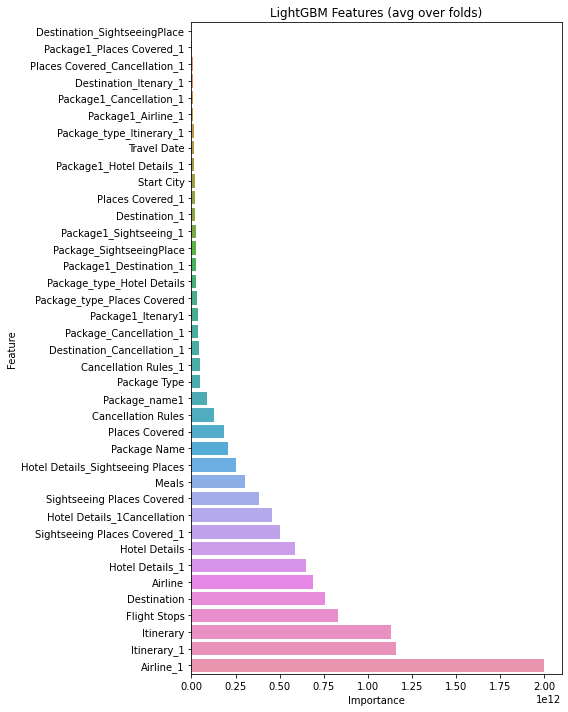

In [ ]:
display_importances(features_importance)

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Sightseeing Places Covered', 'Cancellation Rules',
       'Uniq Id', 'Flight Stops', 'Meals', 'train', 'test', 'Package_name1',
       'Destination_1', 'Itinerary_1', 'Places Covered_1', 'Hotel Details_1',
       'Sightseeing Places Covered_1', 'Cancellation Rules_1', 'Airline_1',
       'Package1_Itenary1', 'Package1_Destination_1',
       'Package1_Places Covered_1', 'Package1_Hotel Details_1',
       'Package1_Sightseeing_1', 'Package1_Cancellation_1',
       'Package1_Airline_1', 'Package_type_Places Covered',
       'Package_type_Itinerary_1', 'Package_type_Hotel Details',
       'Package_SightseeingPlace', 'Package_Cancellation_1',
       'Destination_Itenary_1', 'Destination_SightseeingPlace',
       'Destination_Cancellation_1', 'Places Covered_Cancellation_1',
       'Hotel Details_1Cancellation', 'Hotel Details_Sightseein

In [ ]:
test_data.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Sightseeing Places Covered', 'Cancellation Rules',
       'Uniq Id', 'Flight Stops', 'Meals', 'train', 'test', 'Package_name1',
       'Destination_1', 'Itinerary_1', 'Places Covered_1', 'Hotel Details_1',
       'Sightseeing Places Covered_1', 'Cancellation Rules_1', 'Airline_1',
       'Package1_Itenary1', 'Package1_Destination_1',
       'Package1_Places Covered_1', 'Package1_Hotel Details_1',
       'Package1_Sightseeing_1', 'Package1_Cancellation_1',
       'Package1_Airline_1', 'Package_type_Places Covered',
       'Package_type_Itinerary_1', 'Package_type_Hotel Details',
       'Package_SightseeingPlace', 'Package_Cancellation_1',
       'Destination_Itenary_1', 'Destination_SightseeingPlace',
       'Destination_Cancellation_1', 'Places Covered_Cancellation_1',
       'Hotel Details_1Cancellation', 'Hotel Details_Sightseein

In [ ]:
yfinal=clf.predict(test1)
df=pd.DataFrame(yfinal)

In [ ]:
df.to_csv('final_submission.csv',index=True)